<a href="https://colab.research.google.com/github/gvanathip/ThaiNLP/blob/main/GenerateWordCloudWordCount_from_upload_TextFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. click Runtime เลือก Run All
2. เลื่อนลงมาในส่วน Upload data file click ปุ่ม Choose Files แล้วเลือกไฟล์ข้อมูลที่ต้องการทำ WordCloud มา (เป็นไฟล์ .xlsx ที่มี 1 คอลัมน์และมี header ที่แถวแรก)
3. เลื่อนต่อลงมาด้านล่าง ส่วน Upload THAI font file แล้วเลือกไฟล์ฟอนต์ภาษาไทยที่ต้องการ ที่เป็นไฟล์ .ttf (เนื่องจาก WordCloud ที่ใช้ ยังมีบัคภาษาไทย จึงยังจำเป็นต้อง upload font แบบ manual)
4. เลื่อนลงไปด้านล่าง รอจน run เสร็จ จะได้ WordCloud ออกมา พร้อมไฟล์ที่เป็น WordCount ที่ auto download ไว้ โดยไม่ต้องทำอะไรเลย รออย่างเดียว

## Upload data file (.xlsx only)

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
  df = pd.read_excel(fn)
  print(df)

Saving GoWentGo_Subtitle.xlsx to GoWentGo_Subtitle (1).xlsx
                                   subtitle
0      วันนี้เราจะไปกันที่ดอยสะโง้ครับทุกคน
1       มันคือดอยที่สามารถเห็นได้ 3 แผ่นดิน
2                           ตอนนี้นี่สวยมาก
3               นี่แหละคือความคุ้มค่าตรงนี้
4                            กลับมาแล้วครับ
...                                     ...
36559                            กระบี่ครับ
36560                       ถ้าใครวิดีโอนี้
36561                   อย่าลืมกดไลค์กดแชร์
36562     กด subscription ให้เราด้วยนะครับ 
36563                วันนี้ไปแล้วสวัสดีครับ

[36564 rows x 1 columns]


## Upload THAI font file (.ttf only)

http://www.f0nt.com/release/th-sarabun-new/

In [ ]:
uploaded = files.upload()

Saving THSarabunNew.ttf to THSarabunNew (1).ttf


In [ ]:
for fn in uploaded.keys():
  font_file = fn
print(font_file)

THSarabunNew.ttf


# Wait for processing

In [ ]:
text = ''
for words in df[df.columns[0]].tolist():
  text = text+' '+str(words)

In [ ]:
!pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 4.7 MB/s 


In [ ]:
from pythainlp.tokenize import word_tokenize
from wordcloud import WordCloud
from pythainlp.corpus import thai_stopwords
import matplotlib.pyplot as plt

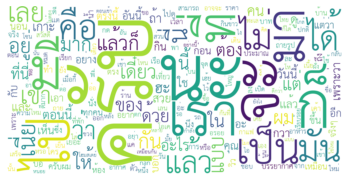

In [ ]:
wordcloud = WordCloud(font_path=font_file,
                      stopwords = ' '.join(thai_stopwords()),
                      background_color="white",
                      width=2048, # กว้าง
                      height=1024, # ยาว
                      collocations=False,
                      regexp=r"[\u0E00-\u0E7Fa-zA-Z']+"
                      ).generate(' '.join(word_tokenize(text)))
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
word_count = pd.Series(word_tokenize(text)).value_counts().sort_values(ascending=False)
word_count = word_count.to_frame().reset_index().rename(columns={"index": "word", 0: "count"})

In [ ]:
word_count.to_csv('word_count.csv')
files.download('word_count.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>